# The German Tank Problem
## Lucas Romero Fernández, February 2025

During the Second World War, the British became very interested in the number of tanks the Germans were producing. Intelligence sources suggested the production was about $900$ to $1\ 600$ tanks per month. They got the squaddies on the battlefield to examine as many captured/disabled tanks as they could and collect all the serial numbers they could find. Suppose seven tanks are captured with the serial numbers $15$, $274$, $198$, $305$, $143$, $294$ and $99$. Assuming that each tank is numbered in sequence as they are built, and that the sequence starts at “$1$”, how many tanks are there in total?

In general, the solutions assume that every tank in the population was equally likely to be captured, that the tanks were not to be replaced (obviously), that the total number of tanks is constant and that uncertainty is present (not all the produced tanks were captured) [1].

**- Frequentist Solution**

The frequentist approach treats the German Tank Problem as the estimation of the maximum (or the tank population size) $n$ of a discrete uniform distribution on the integer interval of serial numbers $[1,\ n]$ based on a data sample of $k$ observations. This situation has already been thoroughly analyzed in the past by, for example, Roger W. Johnson and Leo Goodman in [2] and [3, 4], respectively. For a point estimation, all these studies derive the minimum-variance unbiased estimator (MVUE) of $n$, $\hat{n}$ (equivalent to the mean of $n$), with its somewhat problematic variance $\sigma^{2}$ (since it depends of $n$) as:
$$ \hat{n} = m_{(k)} + \left (\frac{m_{(k)}}{k} - 1 \right ), $$
$$ \sigma^{2} = \frac{(n - k)(n + 1)}{k(k + 2)}, $$
where $m_{(k)}$ is the maximum likelihood biased estimator (due to the reasonable assumption of $n \geq m_{(k)}$) or the maximum serial number observed. These expressions can be somewhat intuitively understood considering that $n \geq m_{(k)}$, and that if large differences in magnitude between the serial numbers are observed after sorting them (including the initial gap before the smallest serial number collected), then $n$ tends to be much greater than $m_{(k)}$ (and conversely with small differences). Therefore, the previous expressions quantify how far $n$ should be estimated beyond $m_{(k)}$ based on the magnitude differences of the observed serial numbers where $\frac{m_{(k)}}{k} − 1$ represents the average size of the differences [1]. With that explanation in mind, considering the specific conditions of this exercise ($m_{(k)} = 305$ and $k = 7$), and assuming that, for the computation of $\sigma^{2}$, $n \approx \hat{n}$, it yields:

In [1]:
import numpy as np
Obs_Ser_Num_list=[15, 274, 198, 305, 143, 294, 99] #Observed serial numbers
m_k = max(Obs_Ser_Num_list) #Agrees with what has been stated before
k = len(Obs_Ser_Num_list) #Agrees with what has been stated before
mean_n = m_k + ((m_k/k) - 1)
sigma2 = ((mean_n - k)*(mean_n + 1))/(k * (k + 2))
sigma = np.sqrt(sigma2)
print("n =", round(mean_n), "+-", round(sigma)) #Rounding to the closest integers due to the context of the exercise

n = 348 +- 43


resulting in a total of $348 \pm 43$ tanks produced per month, an estimate much lower than what the intelligence sources implied ($900$ to $1600$ tanks produced per month), coinciding approximately with the specific data at the time [1, 5].

Alternatively, a previously mentioned study [3] also derived a two-sided 1 - $\alpha$ (with $\alpha$ being the significance level) confidence interval with the assumption of $n \geq m_{(k)}$, expressed as:
$$ n = [m_{(k)}, x], $$
where $x$ is the greatest integer that satisfies $\frac{(m_{(k)} - 1)!(x - k)!}{(m_{(k)} - k - 1)! x!} \geq \alpha$. For a general $95 $% ($\alpha = 0.05$) confidence interval [5], the previous expression simplifies to:
$$ n = \left [m_{(k)},m_{(k)} 20^{\frac{1}{k}}\right ], $$
which, again, in the particular conditions of this exercise ($m_{(k)} = 305$ and $k = 7$):

In [2]:
print("n =","[",m_k,",",round(m_k*20**(1/k)),"]") #Rounding to the closest integer due to the context of the exercise

n = [ 305 , 468 ]


results in a total of $n = [305, 468]$ tanks produced per month, a coherent value to the historical data [1, 5], and undervaluing the intelligence sources as well, but of slightly more generous nature than the previous point estimation version.

**- Bayesian Solution**

According to the Bayesian perspective, the solution to the German Tank Problem is the posterior mass function of $N$, $P(N|D)$, conditioned on the data sample $D$ of the gathered serial numbers. In detail, $P(N|D)$ consists in a function that assigns a probability to each possible tank population size $n$, which depends on its likelihood $P(D|N = n)$, taking into account the probabilistic tank-capturing model to quantify the assistance given by $D$ for the hypothesis that the tank population size is $n$, and its prior probability $P(N = n)$, which quantifies how likely it was that the tank population size was $n$ before the serial numbers were even collected and considered [1]. This can be expressed mathematically by using the Bayes' rule [6]:
$$ P(N|D) \propto P(D|N = n)P(N = n). $$
The prior function $P(N)$, assuming generosity in the uncertainty (or letting the data "speak for itself"), is imposed as a diffuse prior with the indifference principle, specifically, an informed discrete uniform distribution over a set of logically possible values of $n$:
$$ P(N = n) \sim \mathrm{DiscreteUnif}(m_{(k)}, 1600), $$
where, it is known that the lower bound has to be the highest serial number observed $m_{(k)}$, and the upper bound is an arbitrarily large number (for example, due to the data and the intelligence sources, $1600$). The likelihood function $P(D|N = n)$ assigns a probability of observing each possible serial number collected considering each possible $n$, which, by using general probability rules, can be defined as the product of the individual probabilities of the serial numbers $D_{i}$ given $N$.
$$ P(D|N = n) \sim \prod_{i} P(D_{i}|N = n), $$
where, assuming that obtaining any serial number of a tank in the sample is equally likely, $P(D_{i}|N = n)$ can be expressed as:
$$ P(D_{i}|N = n) \sim \mathrm{DiscreteUnif}(1, N), $$
given that the sequence of serial numbers starts at "$1$" and ends at the total possible number of tanks $N$.

With that said, to utilize the available computational capabilities, the MCMC ("Markov Chain Monte Carlo") method can be employed with the Python modules *ArviZ* and *PyMC*, consisting in the repetition of these previous Bayesian analyses for different values of $N$ to compare the likelihood of each of them and present the results of the study as a function of $N$ (for a more detailed theoretical view of this Bayesian approach, see [1]):

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [N]


Output()

Sampling 4 chains for 1_000 tune and 50_000 draw iterations (4_000 + 200_000 draws total) took 49 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
N,365.427,75.577,305.0,489.0,0.753,2.217,12951.0,15310.0,1.0


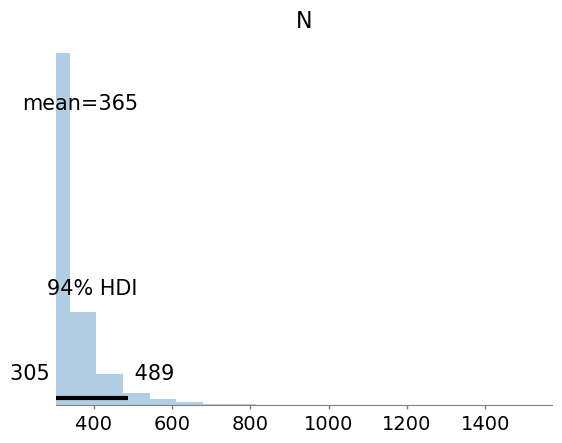

In [3]:
import arviz as az
import pymc as pm
#Bayesian model definition
with pm.Model() as model:
    N = pm.DiscreteUniform("N", lower = m_k, upper = 1600) #Prior function P(N)
    observed_data = pm.DiscreteUniform("Observed_data", lower = 1, upper = N, observed = Obs_Ser_Num_list) #Likelihood function P(D|N)
#Compute MCMC sampling
with model:
    trace = pm.sample(50000) #High number of iterations for good convergence in the method
az.plot_posterior(trace) #Plot of the results
pm.summary(trace) #Results summary

resulting, in summary, in a total of $n \approx [305, 489]$ tanks produced per month for a $97$% HDI interval, with a mean of $\sim 365$ and a standard deviation (SD) of $\sim 76$, which is a similar outcome to the previous frequentist solution (again, estimating a lower value of $n$ than the intelligence sources) and resembles the results obtained historically in [1, 5].

# References

[1] Simon, Cory. (2023). A Bayesian Treatment of the German Tank Problem. The Mathematical Intelligencer. 46. 1-11. 10.1007/s00283-023-10274-6. 

[2] Johnson, Roger. (1994), "Estimating the Size of a Population", Teaching Statistics, 16 (2 (Summer)): 50–52, CiteSeerX 10.1.1.385.5463, doi:10.1111/j.1467-9639.1994.tb00688.x

[3] Goodman, Leo A. (1952). Serial Number Analysis. Journal of the American Statistical Association 47:260, 622–634.

[4] Goodman, Leo A. (1954). Some Practical Techniques in Serial Number Analysis. Journal of the American Statistical Association 49:265, 97–112.

[5] Wikipedia. German Tank Problem. https://en.wikipedia.org/wiki/German_tank_problem. Accessed the 08/02/25.

[6] Slavitt, Isaac. Solving the Bayesian German Tank Problem with PyMC and PyStan. https://www.isaacslavitt.com/posts/german-tank-problem-with-pymc-and-pystan/. Accessed the 09/02/25.